In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl




In [12]:
df = pd.read_csv("dataset/FuelConsumption.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [13]:
df.head(30)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


Text(0, 0.5, 'CO2EMISSION ')

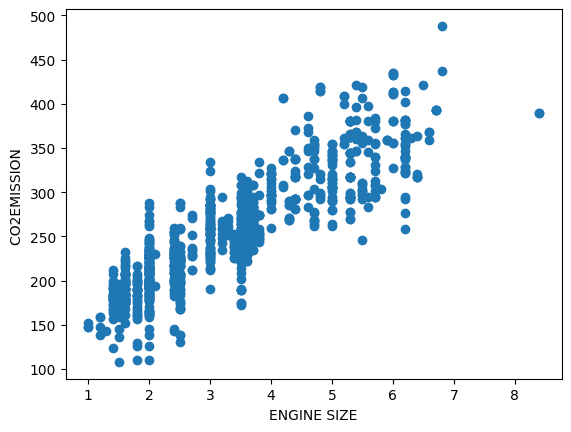

In [19]:
viz=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY",'CO2EMISSIONS']]
pl.scatter(df["ENGINESIZE"],df['CO2EMISSIONS'])
pl.xlabel("ENGINE SIZE")
pl.ylabel("CO2EMISSION ")


Text(0, 0.5, 'CO2EMISSION')

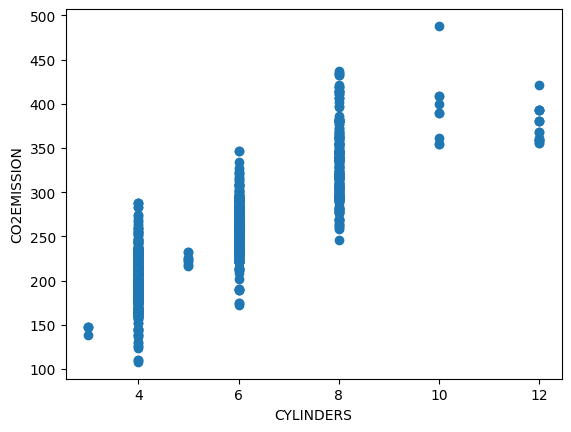

In [21]:
pl.scatter(df["CYLINDERS"],df['CO2EMISSIONS'])
pl.xlabel("CYLINDERS")
pl.ylabel("CO2EMISSION")


Text(0, 0.5, 'CO2EMISSION')

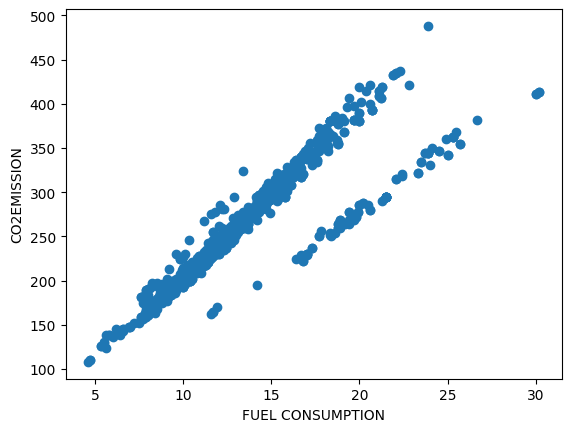

In [22]:
pl.scatter(df["FUELCONSUMPTION_CITY"],df['CO2EMISSIONS'])
pl.xlabel("FUEL CONSUMPTION")
pl.ylabel("CO2EMISSION")

<Axes: xlabel='MAKE'>

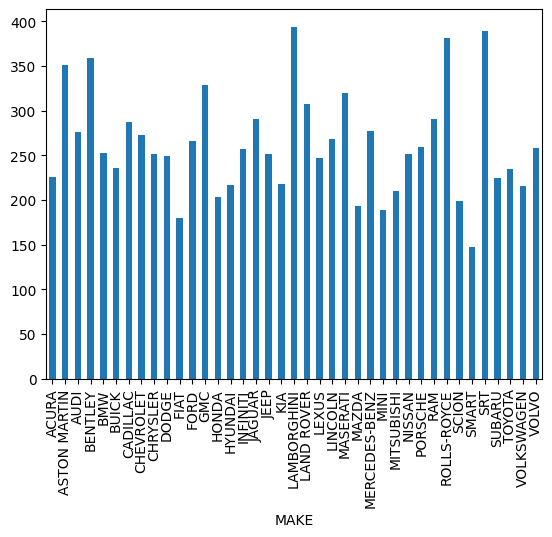

In [23]:
df.groupby('MAKE')['CO2EMISSIONS'].mean().plot(kind='bar')

<Axes: ylabel='CO2EMISSIONS'>

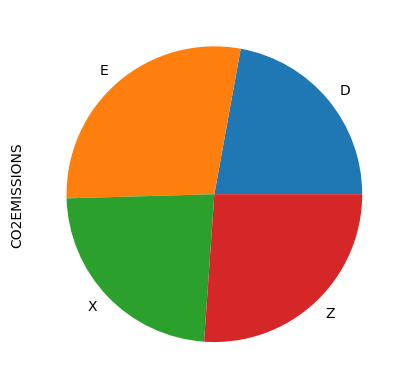

In [26]:
df.groupby('FUELTYPE')['CO2EMISSIONS'].mean().plot(kind='pie')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

pipeline= make_pipeline(PolynomialFeatures(2),LinearRegression())
X=df[["CYLINDERS"]]
Y=df[["CO2EMISSIONS"]]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
pipeline.fit(X_train,Y_train)
pred = pipeline.predict(X_test)
print(np.mean(pred-Y_test)**2)
print(pipeline.score(X_train,Y_train))

70.05202846655256
0.739224668110224
